In [52]:
import sys
import random
import math
import numpy as np
import sklearn
import pandas as pd

import os 
from os import listdir, walk
from os.path import isfile, join

import sys
import matplotlib.pyplot as plt

import tensorflow as tf

In [53]:
def encode_gait_percentage(df, name):
  percent = df[name].values.tolist()
  x = np.zeros((len(df[name]),1))
  y = np.zeros((len(df[name]),1))
  for i in range (len(percent)): 
    phi = percent[i] * 2 * math.pi / 100
    x[i] = math.cos(phi)
    y[i] = math.sin(phi)
    
  df['x'] = x
  df['y'] = y

In [54]:
def shuffle_cycle(all_data):
    all_data.info()
    cycle = 0
    cycle_list = []

    start = 0

    for i in range(len(all_data) - 1):
        if (all_data['perc'][i+1] == 0):
            cycle += 1
            cycle_list.append(all_data.iloc[start:i])
            start = i + 1
    
    random.shuffle(cycle_list)
    source_table = pd.concat(cycle_list, axis=0, ignore_index=True)

    drop_list = ["lgrf","rgrf","l_ph_ank","r_ph_ank"]
    source_table = source_table.drop(drop_list, axis = 1)

    encode_gait_percentage(source_table, 'perc')

    return source_table
    

In [55]:
working_dir = os.getcwd()
sys_platform = sys.platform
excel_path_dict = {'linux' : "/csvs/", 'win32' : "\Data\Incline\\non-normal\\all subject\\", 'darwin' : "/Data/Incline/all subject/"}
excel_path_name = excel_path_dict[sys_platform]

directory_path = working_dir
excel_path = directory_path + excel_path_name

In [56]:
excel_path

'/Users/hikikomori/lab/Gait_Phase_Prediction/Data/Incline/all subject/'

In [57]:
all_file = []

for(dirpath, dirnames, filenames) in walk(excel_path):
    all_file.extend(filenames)
  

In [58]:
len(all_file)

61

In [59]:
all_subject_names = ['YC', 'TH','PH','SKS','VP','AK', 'SD','VN','JL','JS', 'PK', 'SOE']

In [60]:
name = 'VN'
full_data = []

for i in all_file:
    subject =  i.split('_')[0]
    if not subject in name:
        continue
    else:
        print(i)
        full_data.append(pd.read_excel(excel_path + i, sheet_name="Sheet1"))

random.shuffle(full_data)
source_table = pd.concat(full_data, axis = 0, ignore_index = True)


VN_I_0_new_.xlsx
VN_I_2_new_.xlsx
VN_I_4_new_.xlsx
VN_I_3_new_.xlsx
VN_I_5_new_.xlsx


In [61]:
source_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289208 entries, 0 to 289207
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lcop          289208 non-null  float64
 1   rcop          289208 non-null  float64
 2   l_ph_ank      289208 non-null  float64
 3   l_ph_hip      289208 non-null  float64
 4   l_ph_fo       289208 non-null  float64
 5   r_ph_ank      289208 non-null  float64
 6   r_ph_hip      289208 non-null  float64
 7   r_ph_fo       289208 non-null  float64
 8   lgrf          289208 non-null  float64
 9   rgrf          289208 non-null  float64
 10  st_sw_phase   289208 non-null  int64  
 11  strike_frame  289208 non-null  int64  
 12  perc          289208 non-null  float64
 13  lhip_ang      289208 non-null  float64
 14  rhip_ang      289208 non-null  float64
 15  st_l          289208 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 35.3 MB


In [62]:
source_table

,lcop,rcop,l_ph_ank,l_ph_hip,l_ph_fo,r_ph_ank,r_ph_hip,r_ph_fo,lgrf,rgrf,st_sw_phase,strike_frame,perc,lhip_ang,rhip_ang,st_l
0,0.000365,0.003855,123.726376,343.168603,143.524322,207.868268,250.993280,258.376341,0.098125,1.579986,1,3,0.704225,34.661390,-3.710225,0.000000
1,0.000435,0.003861,121.772026,342.537556,136.560471,206.135345,249.451385,260.276542,0.124226,1.569876,2,4,1.056338,34.550593,-3.811647,0.567134
2,0.000511,0.003868,119.914080,341.866149,130.589250,204.801751,247.633603,261.747711,0.152267,1.558202,3,5,1.408451,34.434257,-3.909646,0.565460
3,0.000592,0.003874,118.161393,341.154811,125.536557,203.978290,245.456488,262.899012,0.181600,1.544942,4,6,1.760563,34.312688,-4.002801,0.563709
4,0.000676,0.003880,116.518176,340.403565,121.280374,203.766729,242.798685,263.803452,0.211602,1.530075,5,7,2.112676,34.186252,-4.089749,0.561885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289203,0.000067,0.003084,233.556766,344.132006,359.778014,239.089583,231.207349,124.648254,0.000000,1.736499,209,211,98.130841,29.664682,-14.688762,0.956274
289204,0.000090,0.003083,232.590976,344.730332,359.777994,237.298980,229.388174,121.506873,0.000000,1.742359,210,212,98.598131,29.609456,-14.836392,0.955437
289205,0.000116,0.003080,231.664586,345.294882,359.778614,235.634972,227.709045,119.310170,0.000000,1.743785,211,213,99.065421,29.564447,-14.963052,0.954753
289206,0.000145,0.003075,230.808986,345.805290,359.779669,234.145128,226.214272,117.774595,0.000000,1.740307,212,214,99.532710,29.528934,-15.068772,0.954214


In [63]:
source_table = shuffle_cycle(source_table)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289208 entries, 0 to 289207
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lcop          289208 non-null  float64
 1   rcop          289208 non-null  float64
 2   l_ph_ank      289208 non-null  float64
 3   l_ph_hip      289208 non-null  float64
 4   l_ph_fo       289208 non-null  float64
 5   r_ph_ank      289208 non-null  float64
 6   r_ph_hip      289208 non-null  float64
 7   r_ph_fo       289208 non-null  float64
 8   lgrf          289208 non-null  float64
 9   rgrf          289208 non-null  float64
 10  st_sw_phase   289208 non-null  int64  
 11  strike_frame  289208 non-null  int64  
 12  perc          289208 non-null  float64
 13  lhip_ang      289208 non-null  float64
 14  rhip_ang      289208 non-null  float64
 15  st_l          289208 non-null  float64
dtypes: float64(14), int64(2)
memory usage: 35.3 MB


In [64]:
source_table

,lcop,rcop,l_ph_hip,l_ph_fo,r_ph_hip,r_ph_fo,st_sw_phase,strike_frame,perc,lhip_ang,rhip_ang,st_l,x,y
0,0.000255,0.003450,318.940483,0.980598,222.054493,198.855260,125,1,0.000000,30.959892,-15.354460,1.036158,1.000000,0.000000
1,0.000298,0.003429,318.270259,1.079670,216.383640,200.853383,126,2,0.446429,30.690398,-15.493508,1.032119,0.999607,0.028046
2,0.000344,0.003402,317.625821,1.175622,209.476413,202.779267,1,3,0.892857,30.407926,-15.608166,1.027874,0.998427,0.056070
3,0.000391,0.003371,317.011024,1.266639,201.141423,204.573473,2,4,1.339286,30.112698,-15.697073,1.023423,0.996461,0.084051
4,0.000440,0.003334,316.429575,1.350914,191.338940,206.183865,3,5,1.785714,29.805613,-15.758840,1.018780,0.993712,0.111964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287724,0.000056,0.003668,334.303070,0.183137,245.769170,339.372197,110,207,97.630332,35.948709,-9.388804,1.121153,0.988936,-0.148341
287725,0.000083,0.003660,332.536547,0.222307,243.572358,340.438054,111,208,98.104265,35.788252,-9.603177,1.118884,0.992914,-0.118831
287726,0.000114,0.003648,330.832437,0.263640,240.978839,341.448787,112,209,98.578199,35.609193,-9.802365,1.116346,0.996012,-0.089216
287727,0.000149,0.003634,329.201874,0.306827,237.859917,342.392649,113,210,99.052133,35.410897,-9.984933,1.113529,0.998227,-0.059521


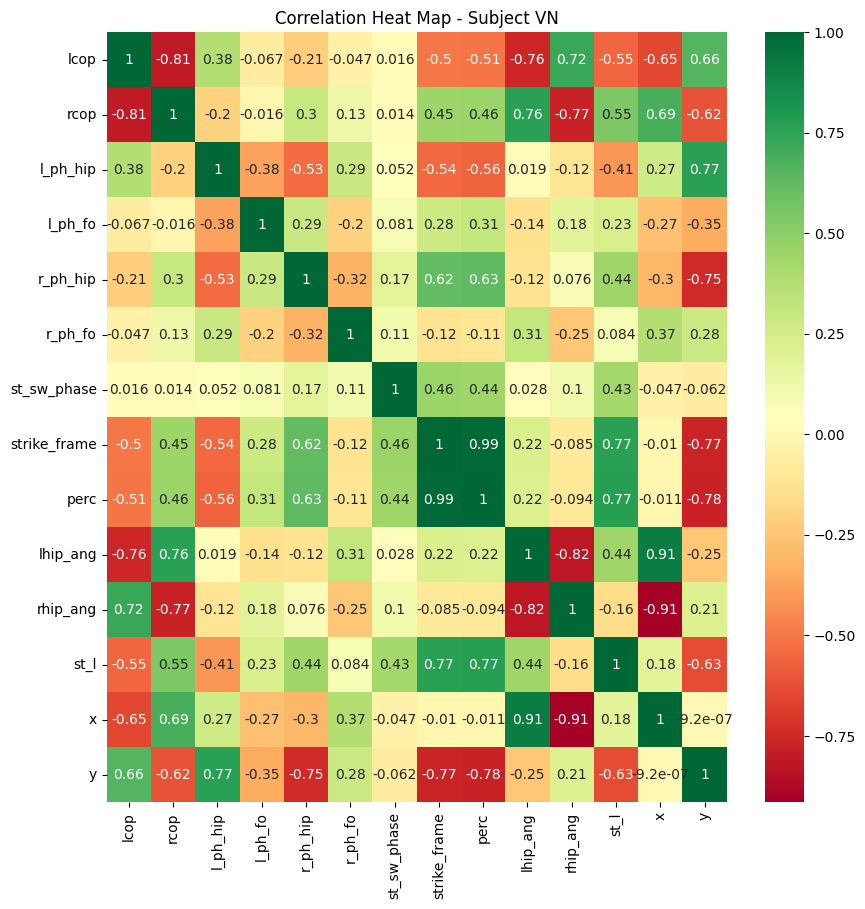

In [65]:
import seaborn as sns
corrmat = source_table.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
plt.title('Correlation Heat Map - Subject ' + name)
g=sns.heatmap(source_table[top_corr_features].corr(),annot=True,cmap="RdYlGn")